<a href="https://colab.research.google.com/github/Altalsof/Desaf-o-Alura-TelecomX-LATAM-/blob/main/challenge2_data_science_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import json
import requests
import plotly.graph_objects as go

In [36]:
# URL del archivo JSON en formato raw de GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos desde la URL
df = pd.read_json(url)

In [37]:
# Mostrar las primeras filas del DataFrame
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [38]:
print("Columnas iniciales:")
print(df.columns)
print("\nPrimeras filas:")
print(df.head())

Columnas iniciales:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Primeras filas:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity'

In [39]:
df.shape

(7267, 6)

#🔧 Transformación

In [40]:
def flatten_df(df, sep="_"):
    df = df.copy()

    # Expandir listas si existen
    list_cols = [c for c in df.columns if df[c].apply(lambda x: isinstance(x, list)).any()]
    for col in list_cols:
        df = df.explode(col, ignore_index=True)

    # Expandir diccionarios recursivamente
    while True:
        dict_cols = [c for c in df.columns if df[c].apply(lambda x: isinstance(x, dict)).any()]
        if not dict_cols:
            break
        for col in dict_cols:
            norm = pd.json_normalize(df[col]).add_prefix(f"{col}{sep}")
            df = pd.concat([df.drop(columns=[col]).reset_index(drop=True),
                            norm.reset_index(drop=True)], axis=1)
    return df

In [41]:
df_flat = flatten_df(df)

print("Columnas planas resultantes:")
print(df_flat.columns.tolist())

print("\nVista previa:")
df_flat.head()

Columnas planas resultantes:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']

Vista previa:


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [42]:
# Reemplazar valores vacíos por NaN y convertir a float
df_flat['account_Charges.Total'] = (
    df_flat['account_Charges.Total']
        .replace(r'^\s*$', np.nan, regex=True)
        .astype(float)
)

# También convertimos Monthly a float por consistencia
df_flat['account_Charges.Monthly'] = df_flat['account_Charges.Monthly'].astype(float)

# Verificamos el resultado
print(df_flat[['account_Charges.Monthly', 'account_Charges.Total']].dtypes)


account_Charges.Monthly    float64
account_Charges.Total      float64
dtype: object


In [43]:
print("🔍 Valores nulos por columna:")
print(df_flat.isnull().sum())


🔍 Valores nulos por columna:
customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges.Monthly       0
account_Charges.Total        11
dtype: int64


In [44]:
df_flat['account_Charges.Total'] = df_flat['account_Charges.Total'].fillna(df_flat['account_Charges.Total'].mean())
print("🔍 Valores nulos por columna:")
print(df_flat.isnull().sum())

🔍 Valores nulos por columna:
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64


In [45]:
# Verificar tipos finales de datos
print("🔎 Tipos de datos por columna:")
print(df_flat.dtypes)

🔎 Tipos de datos por columna:
customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total        float64
dtype: object


In [46]:
# Verificar si hay registros duplicados
duplicados = df_flat.duplicated().sum()
print(f"🔍 Filas duplicadas: {duplicados}")

🔍 Filas duplicadas: 0


In [47]:
# Revision   inconsistencias en categorías
cat_cols = df_flat.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df_flat[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer_gender: ['Female' 'Male']
customer_Partner: ['Yes' 'No']
customer_Dependents: ['Yes' 'No']
phone_PhoneService: ['Yes' 'No']
phone_MultipleLines: ['No' 'Yes' 'No phone service']
internet_InternetService: ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
internet_OnlineBackup: ['Yes' 'No' 'No internet service']
internet_DeviceProtection: ['No' 'Yes' 'No internet service']
internet_TechSupport: ['Yes' 'No' 'No internet service']
internet_StreamingTV: ['Yes' 'No' 'No internet service']
internet_StreamingMovies: ['No' 'Yes' 'No internet service']
account_Contract: ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling: ['Yes' 'No']
account_PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [48]:
# Limpiar Churn: reemplazar valores vacíos por NaN y eliminarlos
df_flat['Churn'] = df_flat['Churn'].replace(r'^\s*$', np.nan, regex=True)
df_flat = df_flat.dropna(subset=['Churn'])

In [49]:
rename_cols = {
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelado',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Adulto_Mayor',
    'customer_Partner': 'Socio',
    'customer_Dependents': 'Dependientes',
    'customer_tenure': 'Antiguedad',
    'phone_PhoneService': 'Servicio_Telefono',
    'phone_MultipleLines': 'Lineas_Adicionales',
    'internet_InternetService': 'Tipo_Internet',
    'internet_OnlineSecurity': 'Seguridad_Online',
    'internet_OnlineBackup': 'Respaldo_Online',
    'internet_DeviceProtection': 'Proteccion_Dispositivo',
    'internet_TechSupport': 'Soporte_Tecnico',
    'internet_StreamingTV': 'TV_Stream',
    'internet_StreamingMovies': 'Cine_Stream',
    'account_Contract': 'Contrato',
    'account_PaperlessBilling': 'Factura_Digital',
    'account_PaymentMethod': 'Metodo_Pago',
    'account_Charges.Monthly': 'Cargo_Mensual',
    'account_Charges.Total': 'Cargo_Total',
    'Cuentas_Diarias': 'Cargo_Diario'
}
df_flat.rename(columns=rename_cols, inplace=True)

In [50]:
# Columnas con respuestas 'Yes'/'No' que deben convertirse a 1/0
columnas_binarias = [
      'Cancelado','Socio','Dependientes', 'Servicio_Telefono', 'Lineas_Adicionales',
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'TV_Stream', 'Cine_Stream', 'Factura_Digital'
]

# Convertir Yes a 1, el resto a 0 (valor binario)
for col in columnas_binarias:
    df_flat[col] = df_flat[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [51]:
# Verificar columnas que contienen solo 'Yes' y 'No'
binarias = [col for col in df_flat.columns if set(df_flat[col].unique()) <= {'Yes', 'No'}]
print("📋 Columnas binarias con 'Yes'/'No':")
print(binarias)


📋 Columnas binarias con 'Yes'/'No':
[]


In [52]:
# Creación de la columna Cuentas_Diarias
# (estimación diaria de facturación mensual)
df_flat['Cuentas_Diarias'] = df_flat['Cargo_Mensual'] / 30

# Verificamos la nueva columna
print(df_flat[['Cargo_Mensual', 'Cuentas_Diarias']].head())

   Cargo_Mensual  Cuentas_Diarias
0           65.6         2.186667
1           59.9         1.996667
2           73.9         2.463333
3           98.0         3.266667
4           83.9         2.796667


#📊 Carga y análisis

In [53]:
# Estadísticas descriptivas generales para variables numéricas
df_flat.describe().T

,count,mean,std,min,25%,50%,75%,max
Cancelado,7043.0,0.265370,0.441561,0.000000,0.000000,0.000,1.000,1.000000
Adulto_Mayor,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.000,1.000000
Socio,7043.0,0.483033,0.499748,0.000000,0.000000,0.000,1.000,1.000000
Dependientes,7043.0,0.299588,0.458110,0.000000,0.000000,0.000,1.000,1.000000
Antiguedad,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
Servicio_Telefono,7043.0,0.903166,0.295752,0.000000,1.000000,1.000,1.000,1.000000
Lineas_Adicionales,7043.0,0.421837,0.493888,0.000000,0.000000,0.000,1.000,1.000000
Seguridad_Online,7043.0,0.286668,0.452237,0.000000,0.000000,0.000,1.000,1.000000
Respaldo_Online,7043.0,0.344881,0.475363,0.000000,0.000000,0.000,1.000,1.000000
Proteccion_Dispositivo,7043.0,0.343888,0.475038,0.000000,0.000000,0.000,1.000,1.000000


In [54]:
columnas_categoricas = df_flat.select_dtypes(include='object').columns

for col in columnas_categoricas:
    print(f"📌 Distribución de la variable categórica: {col}")
    print(df_flat[col].value_counts(normalize=True) * 100)
    print("-" * 50)

📌 Distribución de la variable categórica: ID_Cliente
ID_Cliente
9995-HOTOH    0.014198
0002-ORFBO    0.014198
0003-MKNFE    0.014198
9970-QBCDA    0.014198
9968-FFVVH    0.014198
                ...   
0014-BMAQU    0.014198
0013-SMEOE    0.014198
0013-MHZWF    0.014198
0013-EXCHZ    0.014198
0011-IGKFF    0.014198
Name: proportion, Length: 7043, dtype: float64
--------------------------------------------------
📌 Distribución de la variable categórica: Genero
Genero
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
--------------------------------------------------
📌 Distribución de la variable categórica: Tipo_Internet
Tipo_Internet
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64
--------------------------------------------------
📌 Distribución de la variable categórica: Contrato
Contrato
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64
-

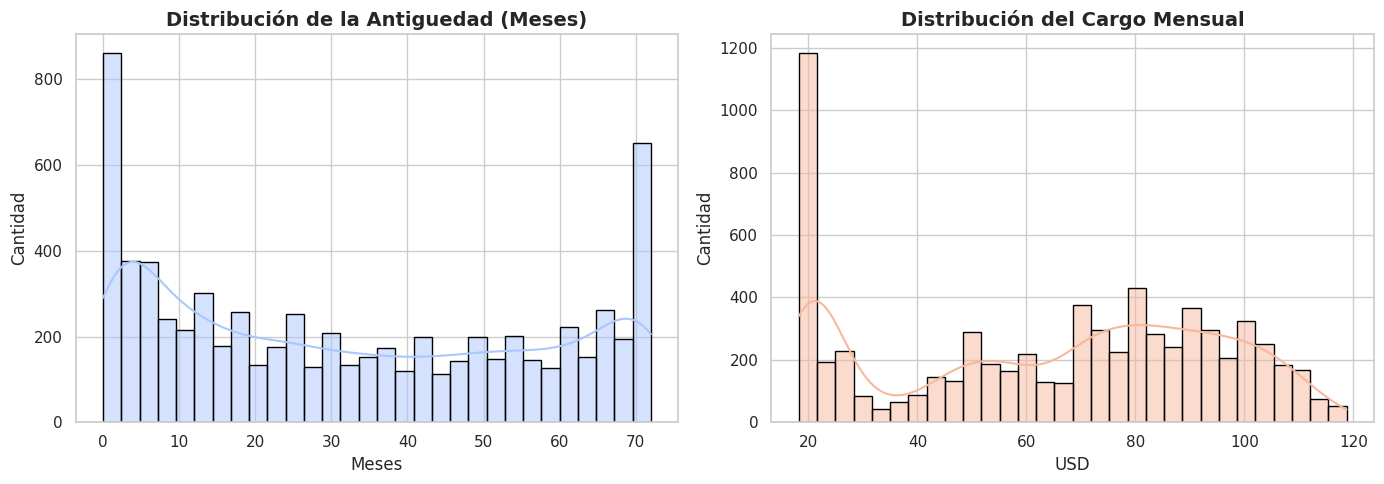

In [55]:
# Histograma para antiguedad (tenure) y cargo mensual
sns.set(style="whitegrid")

# Crear la figura
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Colores personalizados
color1 = sns.color_palette("coolwarm", 8)[2]
color2 = sns.color_palette("coolwarm", 8)[5]

# 📊 Histograma de Antigüedad
sns.histplot(data=df_flat, x='Antiguedad', bins=30, kde=True, ax=axs[0], color=color1, edgecolor='black')
axs[0].set_title('Distribución de la Antiguedad (Meses)', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Cantidad')

# 📊 Histograma de Cargo Mensual
sns.histplot(data=df_flat, x='Cargo_Mensual', bins=30, kde=True, ax=axs[1], color=color2, edgecolor='black')
axs[1].set_title('Distribución del Cargo Mensual', fontsize=14, fontweight='bold')
axs[1].set_xlabel('USD')
axs[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

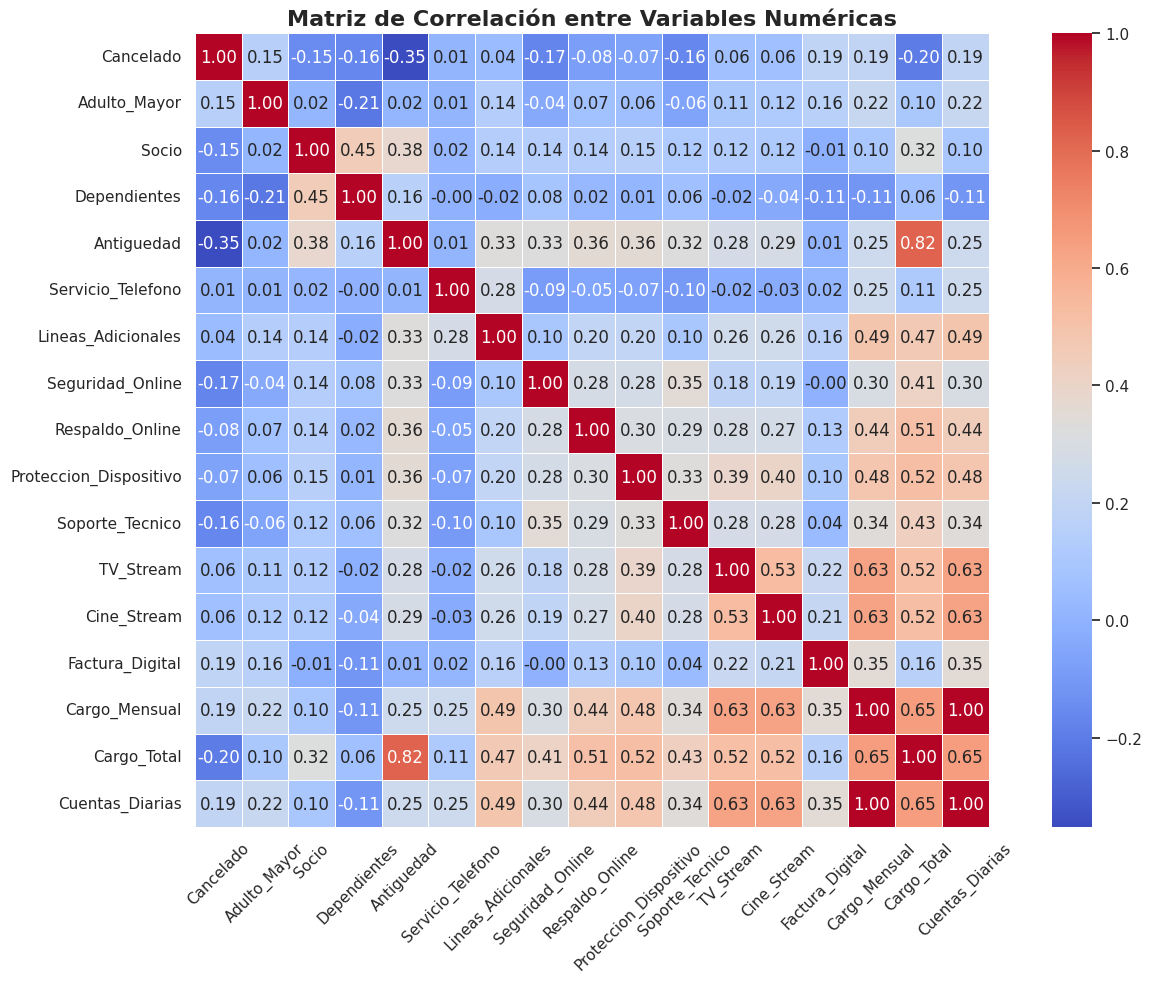

In [56]:
corr_matrix = df_flat.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [57]:
# Ordenar correlaciones con respecto a 'Cancelado'
corr_cancelado = corr_matrix['Cancelado'].sort_values(ascending=False)
print("Correlación de variables con la columna 'Cancelado':")
print(corr_cancelado)

Correlación de variables con la columna 'Cancelado':
Cancelado                 1.000000
Cargo_Mensual             0.193356
Cuentas_Diarias           0.193356
Factura_Digital           0.191825
Adulto_Mayor              0.150889
TV_Stream                 0.063228
Cine_Stream               0.061382
Lineas_Adicionales        0.040102
Servicio_Telefono         0.011942
Proteccion_Dispositivo   -0.066160
Respaldo_Online          -0.082255
Socio                    -0.150448
Dependientes             -0.164221
Soporte_Tecnico          -0.164674
Seguridad_Online         -0.171226
Cargo_Total              -0.199427
Antiguedad               -0.352229
Name: Cancelado, dtype: float64


In [58]:
# Análisis general de la variable objetivo Churn

# Conteo y proporción de clientes activos vs cancelados
churn_counts = df_flat['Cancelado'].value_counts()
churn_percent = df_flat['Cancelado'].value_counts(normalize=True) * 100

print("📊 Clientes por estado Cancelado:")
print(churn_counts)
print("\n📈 Porcentaje de cada grupo:")
print(churn_percent)

📊 Clientes por estado Cancelado:
Cancelado
0    5174
1    1869
Name: count, dtype: int64

📈 Porcentaje de cada grupo:
Cancelado
0    73.463013
1    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-1161476643.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




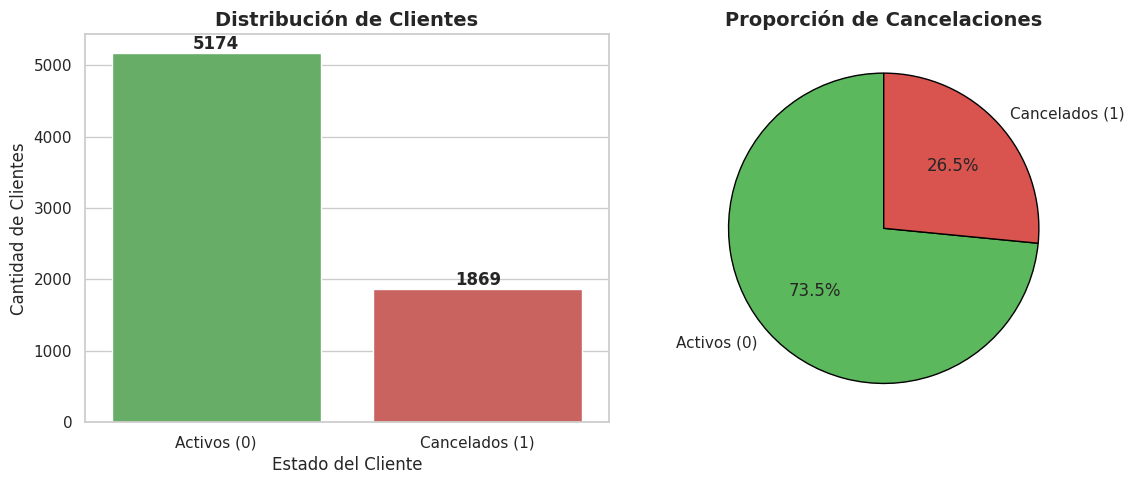

In [59]:
# Cancelado
colores = ['#5cb85c', '#d9534f']  # Verde para activos, rojo para cancelados

# Conteo de valores de Cancelado
conteo_churn = df_flat['Cancelado'].value_counts().sort_index()
etiquetas = ['Activos (0)', 'Cancelados (1)']

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=etiquetas, y=conteo_churn.values, palette=colores, ax=axs[0])
axs[0].set_title('Distribución de Clientes', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Cantidad de Clientes')
axs[0].set_xlabel('Estado del Cliente')
for i, v in enumerate(conteo_churn.values):
    axs[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Gráfico de pastel
axs[1].pie(conteo_churn.values,
           labels=etiquetas,
           autopct='%1.1f%%',
           startangle=90,
           colors=colores,
           wedgeprops={'edgecolor': 'black'})
axs[1].set_title('Proporción de Cancelaciones', fontsize=14, fontweight='bold')

df_churn_plot = pd.DataFrame({
    'Estado': etiquetas,
    'Cantidad': conteo_churn.values
})

plt.tight_layout()
plt.show()

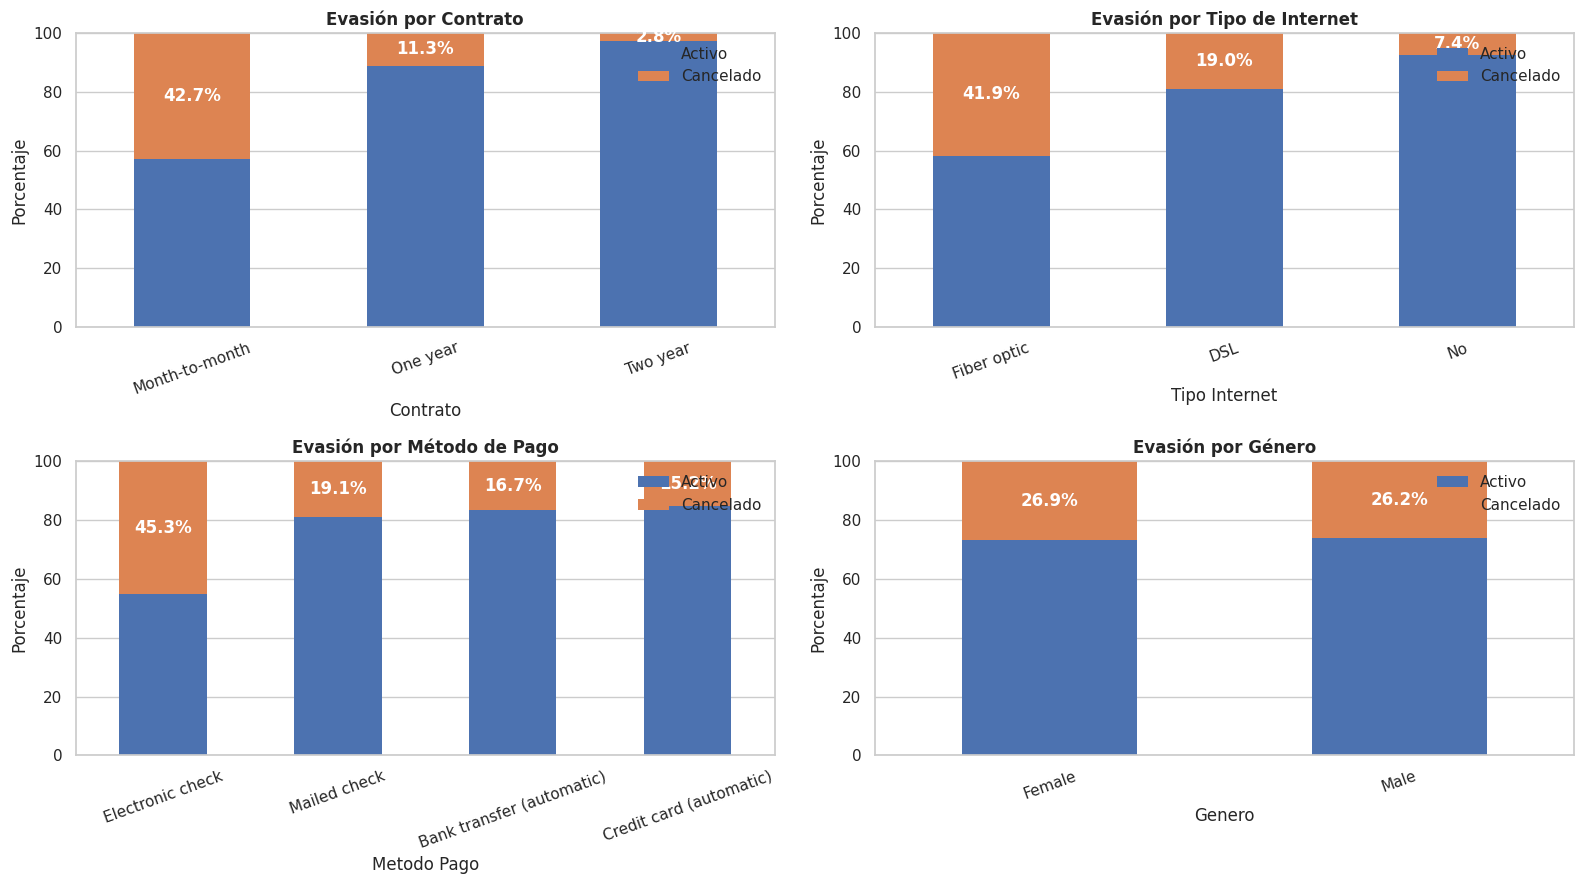

In [60]:
def plot_churn_pct(df, col, ax, title):
    # % por categoría (filas suman 100)
    pct = pd.crosstab(df[col], df['Cancelado'], normalize='index') * 100
    # Asegurar columnas 0(Activo), 1(Cancelado) aunque falte alguna
    pct = pct.reindex(columns=[0, 1], fill_value=0)
    # Ordenar por mayor % de cancelación
    pct = pct.sort_values(1, ascending=False)

    # Barras apiladas
    pct.plot(kind='bar', stacked=True, ax=ax, edgecolor='none')
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(col.replace('_', ' '))
    ax.set_ylabel('Porcentaje')
    ax.set_ylim(0, 100)
    ax.legend(['Activo', 'Cancelado'], loc='upper right', frameon=False)

    # Etiqueta SOLO % de Cancelado (parte superior)
    for i, v in enumerate(pct[1].values):
        ax.text(i, 100 - v/2, f'{v:.1f}%', ha='center', va='center', color='white', fontweight='bold')

    ax.tick_params(axis='x', rotation=20)

# --- 4 paneles (no interactivos) ---
fig, axes = plt.subplots(2, 2, figsize=(16, 9))
plot_churn_pct(df_flat, 'Contrato',       axes[0,0], 'Evasión por Contrato')
plot_churn_pct(df_flat, 'Tipo_Internet',  axes[0,1], 'Evasión por Tipo de Internet')
plot_churn_pct(df_flat, 'Metodo_Pago',    axes[1,0], 'Evasión por Método de Pago')
plot_churn_pct(df_flat, 'Genero',         axes[1,1], 'Evasión por Género')

plt.tight_layout()
plt.show()

In [61]:

vars_cat = ['Genero', 'Contrato', 'Tipo_Internet', 'Metodo_Pago']

def build_pct(df, col):
    pct = pd.crosstab(df[col], df['Cancelado'], normalize='index') * 100
    pct = pct.reindex(columns=[0,1], fill_value=0)            # 0=Activo, 1=Cancelado
    pct = pct.sort_values(1, ascending=False)                 # ordenar por churn
    return pct

# Precalcular datasets por variable
data_dict = {v: build_pct(df_flat, v) for v in vars_cat}

# Figura base (inicial: Contrato)
init = 'Contrato'
base = data_dict[init]

fig = go.Figure()

fig.add_bar(x=base.index, y=base[0], name='Activo', marker_color='#66c2a5')
fig.add_bar(x=base.index, y=base[1], name='Cancelado', marker_color='#fc8d62')

fig.update_layout(
    barmode='stack',
    title='Evasión por Variable Categórica (porcentaje dentro de cada categoría)',
    xaxis_title=init,
    yaxis_title='Porcentaje',
    yaxis=dict(range=[0,100]),
    template='plotly_white',
    legend_title_text='Estado'
)

# Botones para cambiar variable
buttons = []
for v in vars_cat:
    pct = data_dict[v]
    buttons.append(dict(
        label=v,
        method='update',
        args=[
            {'x': [pct.index, pct.index], 'y': [pct[0], pct[1]]},
            {'xaxis': {'title': v}}
        ]
    ))

fig.update_layout(
    updatemenus=[dict(
        type='dropdown',
        x=0.02, y=1.15, xanchor='left',
        buttons=buttons,
        showactive=True
    )]
)

# Mostrar %
fig.update_traces(texttemplate='%{y:.1f}%', textposition='inside', selector=dict(name='Cancelado'))
fig.show()

# Conteo de evasión por variables numéricas

In [62]:
# Variables numéricas que queremos (ajústalas si usas otros nombres)
vars_num = ['Antiguedad', 'Cargo_Mensual', 'Cargo_Total']

# Qué columnas faltan y cuáles existen
faltan = [c for c in vars_num if c not in df_flat.columns]
num_cols = [c for c in vars_num if c in df_flat.columns]

print("No encontradas:", faltan)
print("Usando numéricas:", num_cols)

# Asegurar que sean numéricas (por si alguna quedó como string)
df_num = df_flat.copy()
for c in num_cols:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')

# Resumen por estado (0=Activos, 1=Cancelados)
resumen_cancelado = df_num.groupby('Cancelado')[num_cols].agg(
    ['count','mean','median','std','min','max']
).T

resumen_cancelado

No encontradas: []
Usando numéricas: ['Antiguedad', 'Cargo_Mensual', 'Cargo_Total']


Cancelado                       0            1
Antiguedad    count   5174.000000  1869.000000
              mean      37.569965    17.979133
              median    38.000000    10.000000
              std       24.113777    19.531123
              min        0.000000     1.000000
              max       72.000000    72.000000
Cargo_Mensual count   5174.000000  1869.000000
              mean      61.265124    74.441332
              median    64.425000    79.650000
              std       31.092648    24.666053
              min       18.250000    18.850000
              max      118.750000   118.350000
Cargo_Total   count   5174.000000  1869.000000
              mean    2554.760104  1531.796094
              median  1689.175000   703.550000
              std     2327.013364  1890.822994
              min       18.800000    18.850000
              max     8672.450000  8684.800000

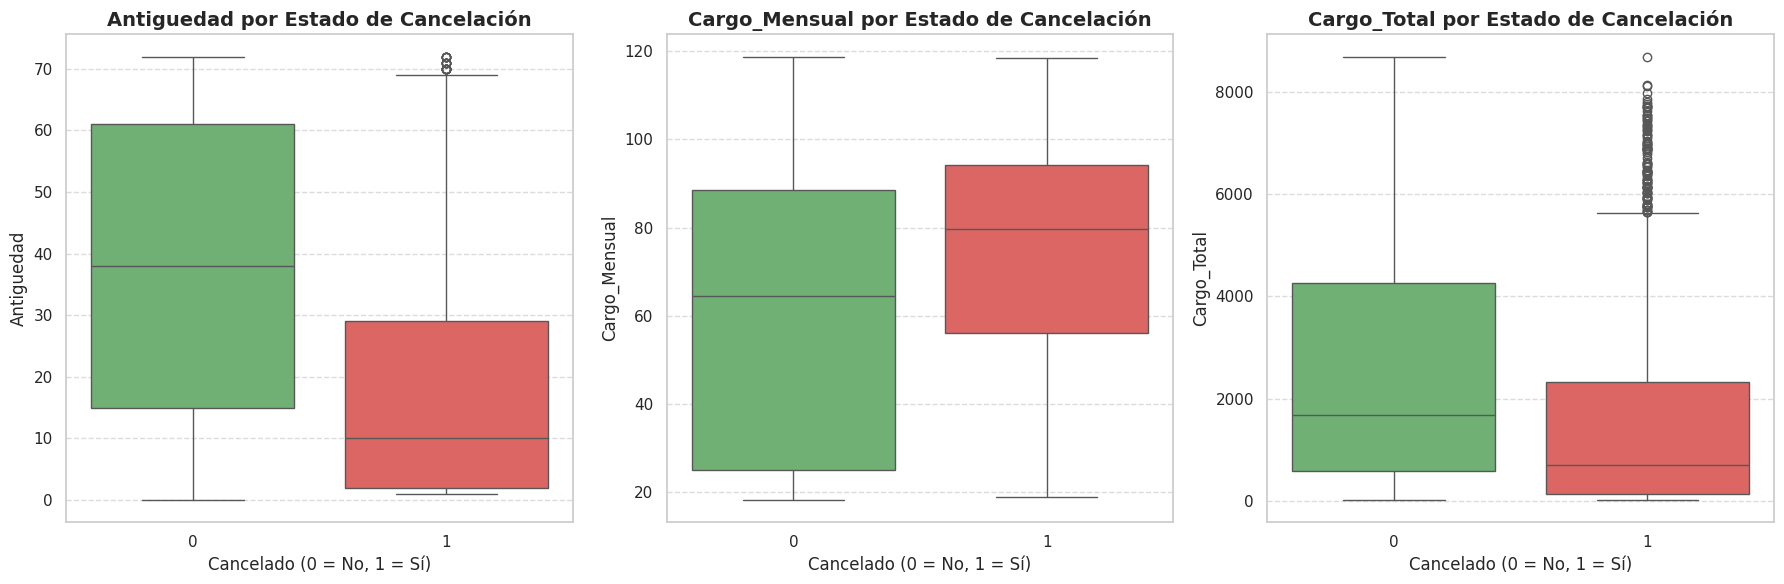

In [63]:
# Variables numéricas que queremos analizar
vars_num = ['Antiguedad', 'Cargo_Mensual', 'Cargo_Total']

# 🎨 Colores (verde = no cancelado, rojo = cancelado)
colores = ['#66bb6a', '#ef5350']

# Crear figura y ejes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(vars_num):
    sns.boxplot(
        data=df_flat,
        x='Cancelado',
        y=var,
        hue='Cancelado',
        palette=colores,
        legend=False,
        ax=axs[i]
    )
    axs[i].set_title(f'{var} por Estado de Cancelación', fontsize=14, fontweight='bold')
    axs[i].set_xlabel('Cancelado (0 = No, 1 = Sí)')
    axs[i].set_ylabel(var)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Análisis de correlación entre variables

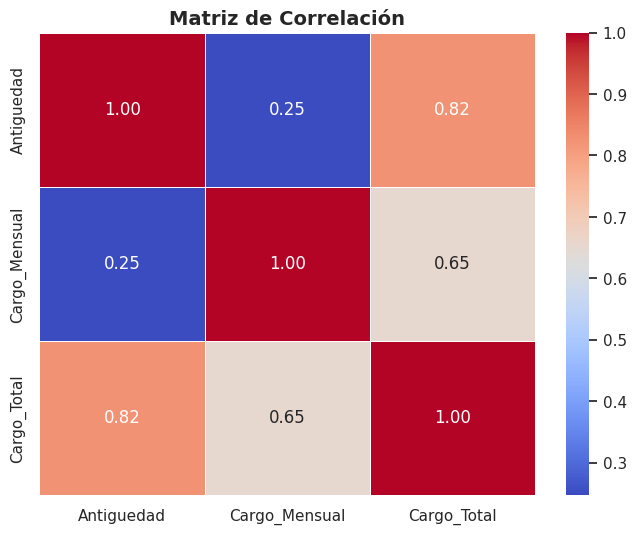

In [64]:
# Calcular matriz de correlación
corr_matrix = df_flat[num_cols].corr()

# 📊 Heatmap de correlación
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Matriz de Correlación', fontsize=14, fontweight='bold')
plt.show()

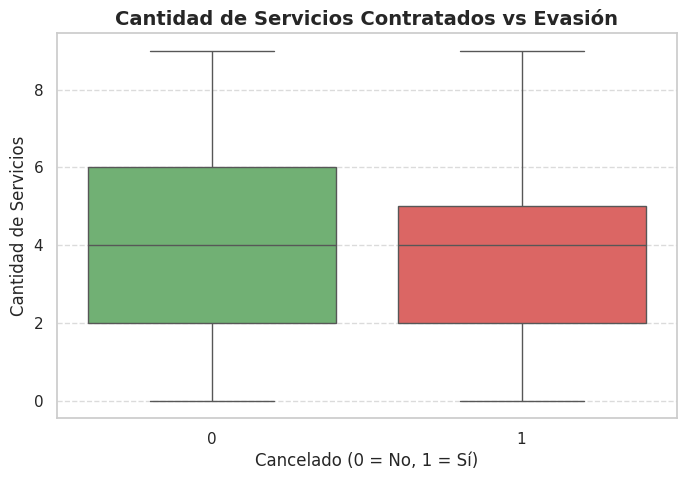

In [65]:
# Lista de servicios binarios (1 = contratado, 0 = no contratado)
servicios_binarios = [
    'Servicio_Telefono', 'Lineas_Adicionales', 'Seguridad_Online',
    'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
    'TV_Stream', 'Cine_Stream', 'Factura_Digital'
]

# Calcular total de servicios contratados por cliente
df_flat['Total_Servicios'] = df_flat[servicios_binarios].sum(axis=1)

# Boxplot de cantidad de servicios vs Cancelado
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_flat,
    x='Cancelado',
    y='Total_Servicios',
    hue='Cancelado',
    palette=['#66bb6a', '#ef5350'],
    legend=False
)
plt.title('Cantidad de Servicios Contratados vs Evasión', fontsize=14, fontweight='bold')
plt.xlabel('Cancelado (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Servicios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
#📄Informe final

#Informe del Proyecto de Análisis de Evasión de Clientes - Telecom X

**1. Extracción de Datos**

En esta fase se cargaron las fuentes de datos proporcionadas, que contenían información demográfica, de servicios contratados y datos financieros de los clientes.

Origen: Archivos CSV provistos por el proyecto.

Estructura: Cada registro representa un cliente único, identificado por customerID.

Contenido:

Variables categóricas como género, tipo de contrato, servicios adicionales, método de pago.

Variables numéricas como antigüedad (meses de contrato), cargo mensual y total gastado.

Variable objetivo (Churn) que indica si el cliente canceló el servicio.

Durante la extracción se validó:

Integridad de los registros (no duplicados en customerID).

Presencia de valores nulos en columnas clave.

**2. Transformación de Datos**

En esta etapa se realizaron los siguientes ajustes:

a) Limpieza y estandarización

Corrección de valores inconsistentes en variables categóricas.

Conversión de respuestas tipo "Yes" y "No" a valores binarios 1 y 0 en múltiples columnas, como Socio, Dependientes, Servicio_Telefono, Seguridad_Online, entre otras.

Eliminación de espacios en blanco y uniformización de mayúsculas/minúsculas.

b) Creación de nuevas variables

Cargo_Diario: calculado a partir de Cargo_Mensual dividido entre 30 para obtener un estimado diario.

Mapeo de la variable Churn a Cancelado (0 = activo, 1 = cancelado).

c) Renombrado de columnas

Se reemplazaron nombres originales en inglés o técnicos por nombres cortos y claros en español (ej. Partner → Socio, PaymentMethod → Metodo_Pago).

**3. Carga y Preparación para el Análisis**

Con los datos ya transformados:

Se verificó el formato de cada columna (numérico o categórico según corresponda).

Se aseguraron consistencia y valores válidos en las variables binarias y numéricas.

El dataset final se dejó listo para análisis exploratorio y modelado.

**4. Análisis de Datos**

a) Análisis Descriptivo

Antigüedad: Los clientes activos tienen en promedio 37.6 meses de contrato, mientras que los que cancelaron tienen 18 meses.

Cargo Mensual: Los clientes que cancelaron pagan en promedio $74.44, frente a $61.26 de los activos.

Cargo Total: Los clientes activos presentan un gasto acumulado mayor, lo que sugiere que la antigüedad influye en este valor.

b) Distribución de la evasión (Cancelado)

Aproximadamente el 26.5% de los clientes han cancelado.

Visualizaciones de barras mostraron un claro desbalance entre clientes activos y cancelados.

c) Evasión por variables categóricas

Tipo de contrato: Los clientes con contratos mensuales muestran una tasa de cancelación significativamente más alta que los de contratos anuales o bianuales.

Método de pago: Aquellos que usan pagos electrónicos automáticos tienden a cancelar menos.

Género: No se observó una diferencia significativa en la tasa de cancelación.

d) Evasión por variables numéricas

Boxplots evidenciaron que los clientes con menor antigüedad y cargos totales más bajos tienden a cancelar más.

Los clientes con cargos mensuales más altos presentan una ligera mayor probabilidad de cancelación.

e) Correlación entre variables (opcional)

Correlación moderada entre Antiguedad y Cargo_Total (esperada por acumulación en el tiempo).

Cancelado muestra mayor relación negativa con Antiguedad y positiva con Cargo_Mensual.

**Conclusiones y Recomendaciones**

Antigüedad y contrato son factores clave: clientes nuevos y con contratos mensuales presentan mayor riesgo de evasión.

Precio mensual alto puede influir en la cancelación, especialmente en clientes con poco tiempo en la empresa.

El método de pago es un elemento a considerar: incentivar pagos automáticos podría reducir la evasión.

El análisis sugiere que una estrategia de retención temprana (primeros 12 meses) podría impactar positivamente.

